In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [6]:
data= pd.read_csv("D:\\DATA_science\\Data_sets\\train.csv")

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.shape

(2201, 4)

In [8]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [14]:
data.groupby('Survived')['PassengerId'].count()

Survived
0    549
1    342
Name: PassengerId, dtype: int64

## Visual Exploration

<AxesSubplot:xlabel='Survived', ylabel='Age'>

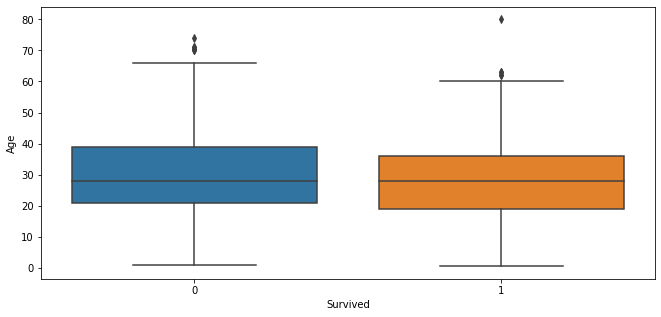

In [15]:
f, ax = plt.subplots(figsize=(11, 5))
sns.boxplot(x='Survived', y='Age', data=data)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

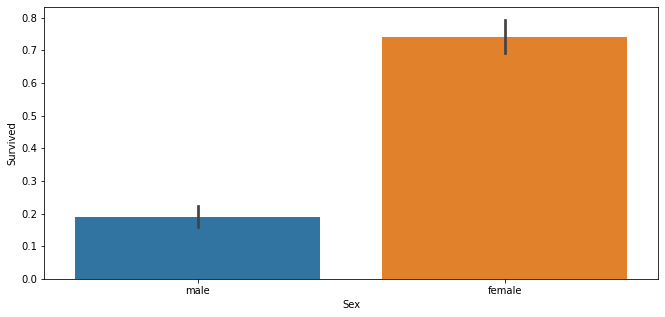

In [17]:
f, ax = plt.subplots(figsize=(11, 5))
sns.barplot(x='Sex', y='Survived', data=data)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

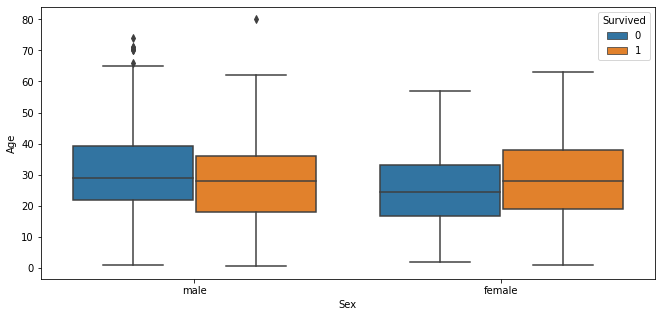

In [19]:
f, ax = plt.subplots(figsize=(11, 5))
sns.boxplot(x='Sex', y='Age', hue='Survived', data=data)

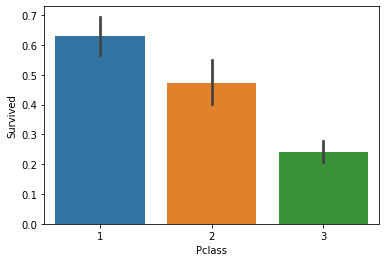

In [22]:
sns.barplot(x='Pclass', y='Survived', data=data)
plt.show()

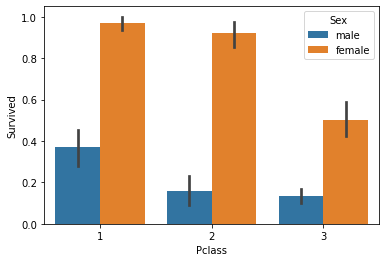

In [24]:
sns.barplot(x='Pclass', y='Survived',hue='Sex', data=data)
plt.show()

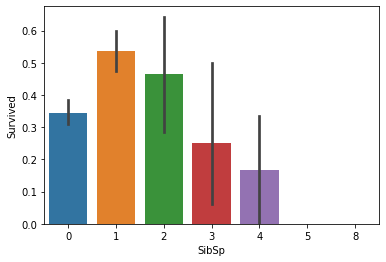

In [25]:
sns.barplot(x='SibSp', y='Survived', data=data)
plt.show()

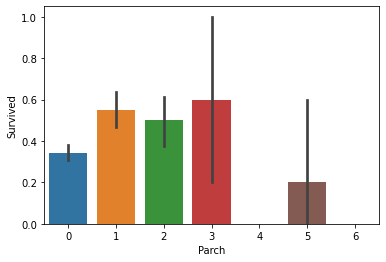

In [26]:
sns.barplot(x='Parch', y='Survived', data=data)
plt.show()

Text(0.5, 1.0, 'Survived')

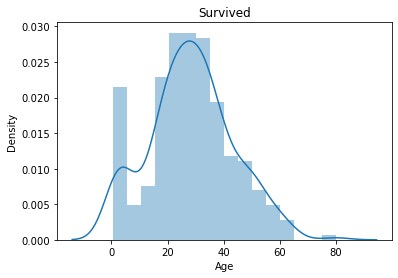

In [27]:
survived=data.loc[data['Survived']==1, "Age"].dropna()
sns.distplot(survived)
plt.title("Survived")

Text(0.5, 1.0, 'Not_Survived')

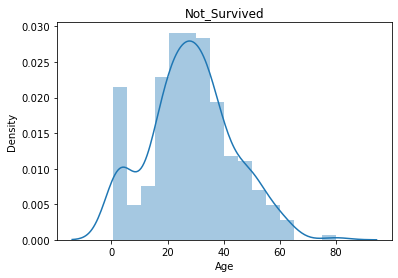

In [28]:
Not_survived=data.loc[data['Survived']==0, "Age"].dropna()
sns.distplot(survived)
plt.title("Not_Survived")

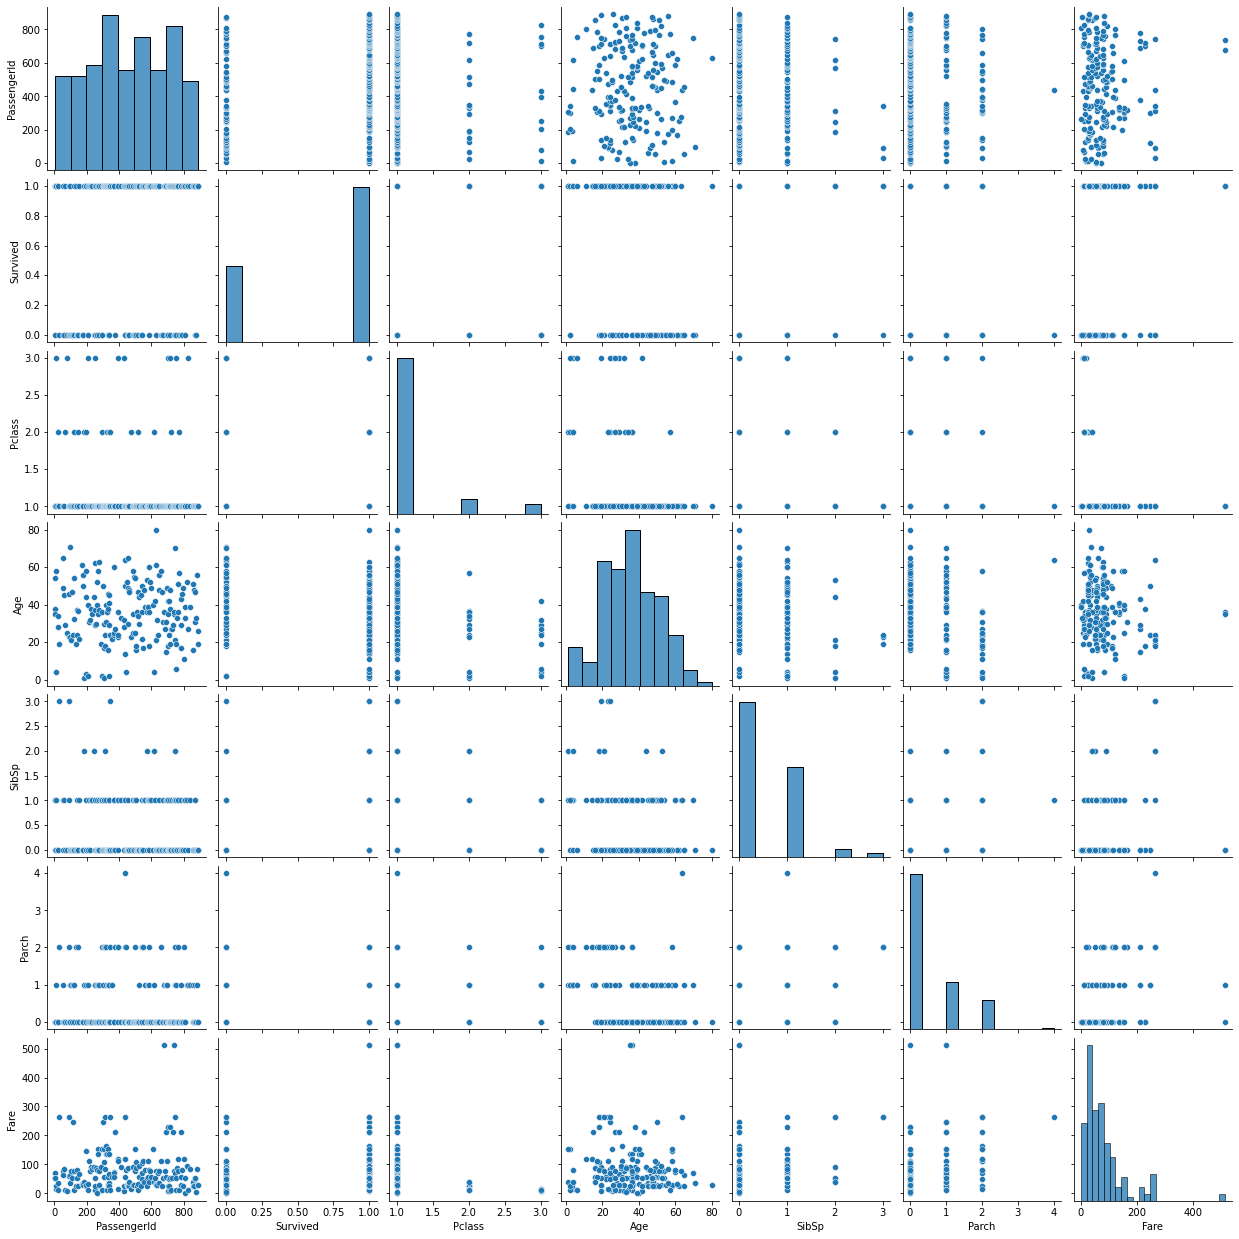

In [29]:
sns.pairplot(data.dropna())

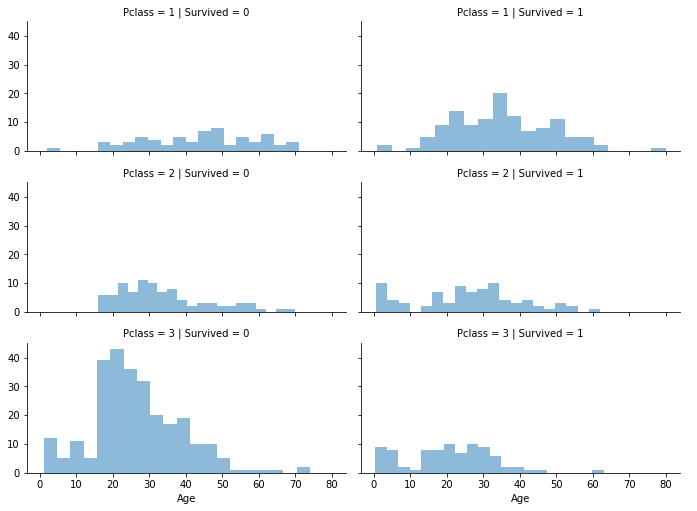

In [33]:
## Pclass vs Survive
grid = sns.FacetGrid(data, col='Survived', row='Pclass', size=2.4, aspect=2)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

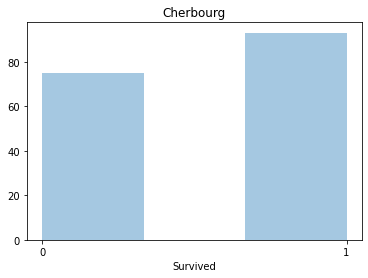

In [34]:
sns.distplot(a=data[data['Embarked']=='C']['Survived'], bins=3, kde=False)
plt.title("Cherbourg")
plt.xticks([0, 1])
plt.show()

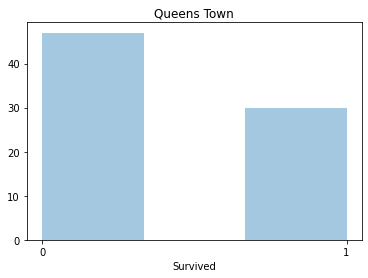

In [35]:
sns.distplot(a=data[data['Embarked']=='Q']['Survived'], bins=3, kde=False)
plt.title("Queens Town")
plt.xticks([0, 1])
plt.show()

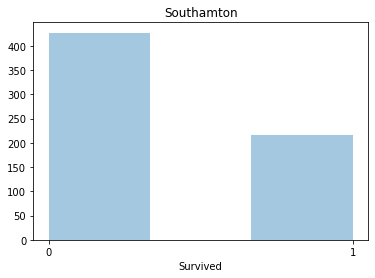

In [36]:
sns.distplot(a=data[data['Embarked']=='S']['Survived'], bins=3, kde=False)
plt.title("Southamton")
plt.xticks([0, 1])
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

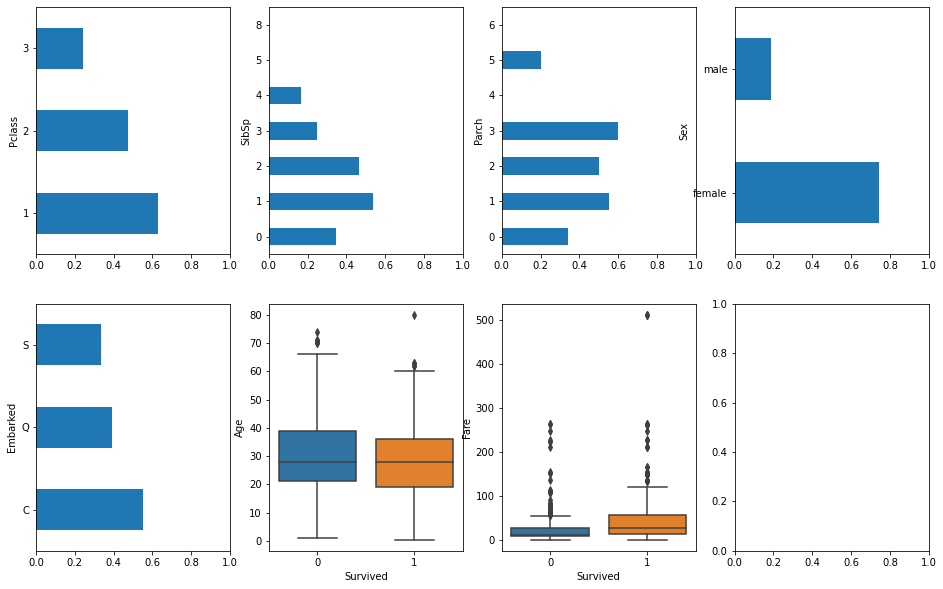

In [43]:
figbi, axesbi = plt.subplots(2, 4, figsize=(16, 10))
data.groupby('Pclass')['Survived'].mean().plot(kind='barh', ax=axesbi[0, 0], xlim=[0, 1])
data.groupby('SibSp')['Survived'].mean().plot(kind='barh', ax=axesbi[0, 1], xlim=[0, 1])
data.groupby('Parch')['Survived'].mean().plot(kind='barh', ax=axesbi[0, 2], xlim=[0, 1])
data.groupby('Sex')['Survived'].mean().plot(kind='barh', ax=axesbi[0, 3], xlim=[0, 1])
data.groupby('Embarked')['Survived'].mean().plot(kind='barh', ax=axesbi[1, 0], xlim=[0, 1])
sns.boxplot(x='Survived', y='Age', data=data, ax=axesbi[1, 1])
sns.boxplot(x='Survived', y= 'Fare', data=data, ax=axesbi[1, 2])